In [2]:
import pandas as pd
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder

data_frame = pd.read_csv('./us_perm_visas.csv', low_memory=False, parse_dates=['decision_date', 'case_received_date'])
tot_data_num, tot_data_dim = data_frame.shape

print ("Total data num : {}".format(tot_data_num))
print ("Total data dimension : {}".format(tot_data_dim))

Total data num : 374362
Total data dimension : 154


In [3]:
for value in data_frame.case_status.unique():
    print ("Case {} : {}".format(value, len(data_frame[data_frame['case_status'] == value])))

Case Certified : 181933
Case Denied : 25649
Case Certified-Expired : 148586
Case Withdrawn : 18194


In [4]:
data_frame = data_frame[data_frame.case_status != 'Withdrawn']
data_frame.loc[data_frame.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
data_frame = data_frame.dropna(axis=1, how='all')
data_frame = data_frame.dropna(axis=0, how='all')

tot_data_num, tot_data_dim = data_frame.shape

print ("Total data num : {}".format(tot_data_num))
print ("Total data dimension : {}".format(tot_data_dim))

Total data num : 356168
Total data dimension : 154


Attribute 'add_these_pw_job_title_9089' contains  0.8901164618943869  missing values
Attribute 'agent_city' contains  0.43084162530042003  missing values
Attribute 'agent_firm_name' contains  0.44261696727387073  missing values
Attribute 'agent_state' contains  0.4395229217672559  missing values
Attribute 'application_type' contains  0.6438534624109971  missing values
Attribute 'case_no' contains  0.6438534624109971  missing values
Attribute 'case_number' contains  0.35614653758900294  missing values
Attribute 'case_received_date' contains  0.35614653758900294  missing values
Attribute 'case_status' contains  0.0  missing values
Attribute 'class_of_admission' contains  0.05919959120415085  missing values
Attribute 'country_of_citizenship' contains  0.0541092967363716  missing values
Attribute 'country_of_citzenship' contains  0.9460451247725792  missing values
Attribute 'decision_date' contains  0.0  missing values
Attribute 'employer_address_1' contains  0.00010388356056692347  missin

Attribute 'recr_info_coll_univ_teacher' contains  0.3562251521753779  missing values
Attribute 'recr_info_employer_rec_payment' contains  0.35619146020978865  missing values
Attribute 'recr_info_first_ad_start' contains  0.3728745985040767  missing values
Attribute 'recr_info_job_fair_from' contains  0.9951680106017385  missing values
Attribute 'recr_info_job_fair_to' contains  0.9951792412569349  missing values
Attribute 'recr_info_on_campus_recr_from' contains  0.9950444733945778  missing values
Attribute 'recr_info_on_campus_recr_to' contains  0.9950641270411715  missing values
Attribute 'recr_info_pro_org_advert_from' contains  0.9626721097908852  missing values
Attribute 'recr_info_pro_org_advert_to' contains  0.9626889557736799  missing values
Attribute 'recr_info_prof_org_advert_from' contains  0.9230784348958918  missing values
Attribute 'recr_info_prof_org_advert_to' contains  0.9230980885424855  missing values
Attribute 'recr_info_professional_occ' contains  0.356183037218391

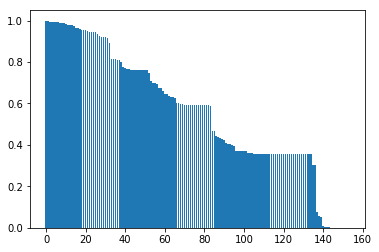

In [5]:
import matplotlib.pyplot as plt

plot_dict = dict()
label_list = list()
num_list = list()
for column in data_frame.columns:
    print("Attribute '{}' contains ".format(column),  data_frame[column].isnull().sum().sum() / data_frame.shape[0], " missing values")
    plot_dict[column] = data_frame[column].isnull().sum().sum() / data_frame.shape[0]
    label_list.append(column)
    num_list.append(data_frame[column].isnull().sum().sum() / data_frame.shape[0])

num_list.sort()
num_list = num_list[::-1]
#print (num_list)
#print (list(range(len(num_list))))
plt.bar(list(range(len(num_list))), num_list)
print (label_list)

plt.savefig('missing_value_percentage.png')

In [6]:
data_frame['year'] = data_frame['decision_date'].dt.year

year_list = [2012, 2013, 2014, 2015, 2016]
label_list = ['Certified', 'Denied']

for year in year_list:
    certified = data_frame[(data_frame['year'] == year) & (data_frame['case_status'] == 'Certified')].shape[0]
    denied = data_frame[(data_frame['year'] == year) & (data_frame['case_status'] == 'Denied')].shape[0]
    print (certified, denied, denied/certified)


19116 2838 0.14846202134337727
32040 5433 0.1695692883895131
69458 4423 0.06367876990411472
86404 5934 0.06867737604740522
114027 5893 0.051680742280337116


NEW YORK           17198
COLLEGE STATION    11985
SANTA CLARA        10519
SAN JOSE            9147
REDMOND             8485
MOUNTAIN VIEW       8121
HOUSTON             6720
SAN FRANCISCO       6352
SUNNYVALE           6104
PLANO               5607
Name: employer_city, dtype: int64


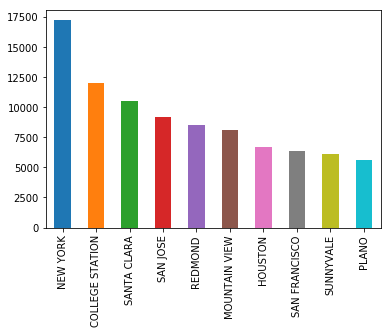

In [7]:
data_frame['employer_city'] = data_frame['employer_city'].str.upper()
data_frame.employer_city.value_counts().iloc[:10].plot.bar(rot=90)
print (data_frame.employer_city.value_counts().iloc[:10])
plt.savefig('employer_city.png')

([<matplotlib.patches.Wedge at 0x11a2bda58>,
 [Text(0.176212,1.18699,'IT'),
  Text(-1.09093,-0.140943,'Other Economic Sector'),
  Text(-0.865752,-0.678582,'Aerospace'),
  Text(-0.309132,-1.05567,'Advanced Mfg'),
  Text(0.4985,-0.98056,'Educational Services'),
  Text(0.818316,-0.735091,'Retail'),
  Text(0.924637,-0.595858,'Construction'),
  Text(0.973921,-0.511349,'Hospitality'),
  Text(1.01266,-0.429558,'Automotive'),
  Text(1.08124,-0.202282,'Health Care')],
 [Text(0.10279,0.692412,'45.3%'),
  Text(-0.595054,-0.0768781,'13.5%'),
  Text(-0.472229,-0.370135,'3.6%'),
  Text(-0.168617,-0.57582,'16.2%'),
  Text(0.271909,-0.534851,'7.9%'),
  Text(0.446354,-0.400959,'3.9%'),
  Text(0.504347,-0.325013,'1.2%'),
  Text(0.53123,-0.278918,'1.6%'),
  Text(0.55236,-0.234304,'1.0%'),
  Text(0.589768,-0.110336,'5.9%')])

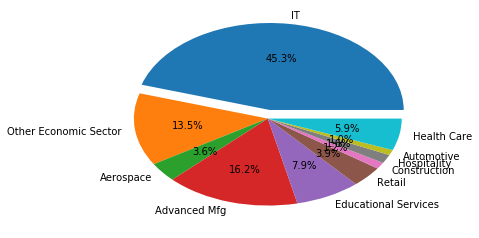

In [8]:
us_economic_counts = dict()

for value in data_frame['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
        us_economic_counts[value] = 1
        
usecolabels = []
usecovalues = []
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)

for key, value in us_economic_counts.items():
    usecolabels.append(key)
    usecovalues.append(value)
    
plt.pie(usecovalues[:10], labels=usecolabels[:10], explode = explode, autopct='%1.1f%%') 

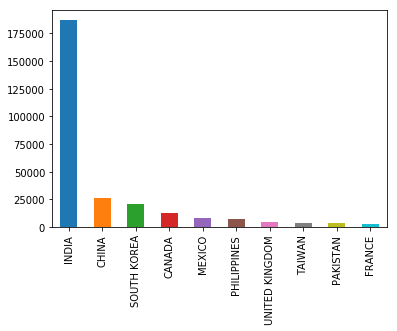

In [9]:
data_frame.country_of_citizenship.value_counts().iloc[:10].plot.bar(rot=90)


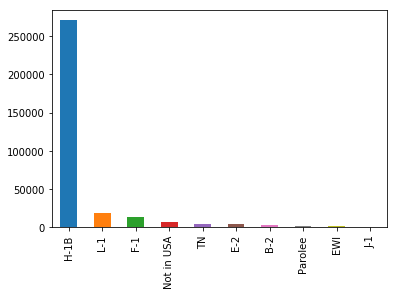

In [10]:
data_frame.class_of_admission.value_counts().iloc[:10].plot.bar(rot=90)




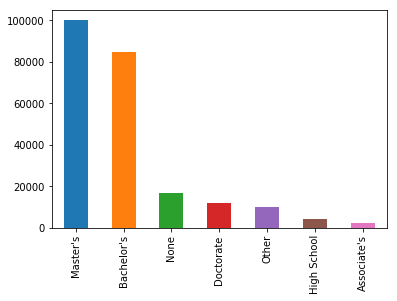

In [11]:
data_frame.foreign_worker_info_education.value_counts().iloc[:10].plot.bar(rot=90)


In [12]:
#Replacing commas with whitespace character
data_frame['pw_amount_9089'] = data_frame['pw_amount_9089'].str.replace(",","") 

for unit in data_frame.pw_unit_of_pay_9089.unique():
    if unit == "hr" or unit == "Hour":
        data_frame.loc[data_frame['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = data_frame['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250)
        data_frame.loc[data_frame['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = data_frame['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "wk" or unit == "Week":
        data_frame.loc[data_frame['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = data_frame['pw_amount_9089'].apply(lambda x: float(x) * 50)
        data_frame.loc[data_frame['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = data_frame['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "mth" or unit == "Month":
        data_frame.loc[data_frame['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = data_frame['pw_amount_9089'].apply(lambda x: float(x) * 12)
        data_frame.loc[data_frame['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = data_frame['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "bi" or unit == "Bi-Weekly":  
        data_frame.loc[data_frame['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = data_frame['pw_amount_9089'].apply(lambda x: float(x) * 25)
        data_frame.loc[data_frame['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = data_frame['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit =="yr":
         data_frame.loc[data_frame['pw_unit_of_pay_9089'] == unit ,'pw_unit_of_pay_9089'] = data_frame['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue
        
#Filling missing values with median 
data_frame['pw_amount_9089']= data_frame['pw_amount_9089'].fillna((data_frame['pw_amount_9089'].median()))

#Changing format from string to float
data_frame['pw_amount_9089'] = data_frame.pw_amount_9089.astype(float)

#Displaying 10 first values
data_frame[['pw_amount_9089','pw_unit_of_pay_9089']].head(10)

data_frame['remuneration'] = pd.cut(data_frame['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = data_frame['remuneration'].value_counts()


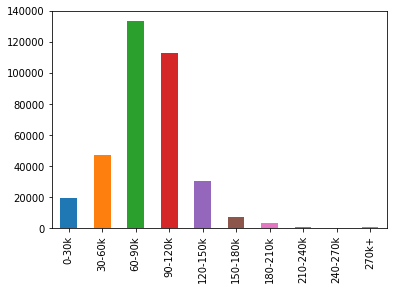

In [13]:
import numpy as np
salary.iloc[np.argsort(salary.index)].plot.bar(rot=90)